In [1]:
# import the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
heart = pd.read_csv("https://raw.githubusercontent.com/SUM31/HEY/master/heart.csv")

In [3]:
heart.head()  #displays top 5 entries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.target.value_counts() #no. of patients having heart diseases

1    165
0    138
Name: target, dtype: int64

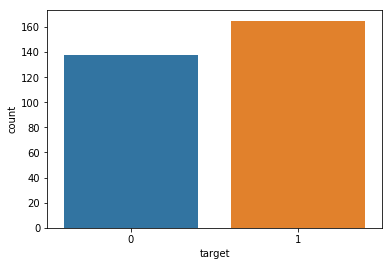

In [5]:
#165 patients have heart disease...
#in graphical form
sns.countplot(x="target",data=heart,)
plt.show()

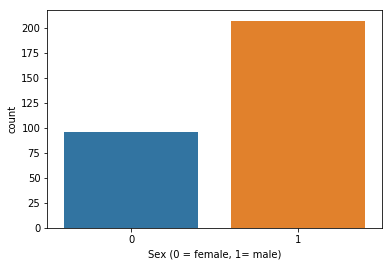

In [6]:
#classification of patients between male and female and visualize it.
sns.countplot(x='sex', data=heart,)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

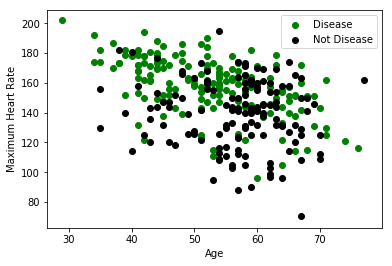

In [9]:
# relation of age and max heart rate.
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="green")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)], c = 'black')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [11]:
X = heart.iloc[:,:-1].values
y = heart.iloc[:,13].values
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.25, random_state= 0) #splitted the data into 75%(training set) and 25%(test set)

In [12]:
#normalizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
#implementing KNN model and train it
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # always take the optimal value for K
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.82


In [19]:
#check for different values of K
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [20]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


In [21]:
classifier = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.87


In [22]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.86


In [24]:
#best accuracy is with k=7
#check the correct prediction using confusion martix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  8],
       [ 3, 40]])